In [1]:
import numpy as np
import scipy.special
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class neuralNetwork:
    
    # iniacjalizacja sieci neuronowej
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate, momentum):
        # ustawienie liczby neuronów w każdej z warstw
        self.iNodes = inputNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        
        # ustawienie współczynnika uczenia
        self.lr = learningRate
        # ustawienie współcznnoka momentum
        self.mom = momentum
        
        #losowanie wag
        self.wih = np.random.normal(0.0, pow(self.iNodes, -0.5),(self.hNodes, self.iNodes))
        self.who = np.random.normal(0.0, pow(self.hNodes, -0.5), (self.oNodes, self.hNodes))
        
        #funkcja aktywacji - sigmoid
        self.activation_fun = lambda x: scipy.special.expit(x)
        
        self.prev_delta_who = 0
        self.prev_delta_wih = 0
        
        
    # metoda ucząca
    def train(self, input_list, targets_list):
        # zamiana list na macierz 2d
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # obliczanie sygnału do warstwy ukrytej
        hidden_inputs = np.dot(self.wih,inputs)
        # obliczanie sygnału wychodzącego z warstwy ukrytej
        hidden_outputs = self.activation_fun(hidden_inputs)
        
        # obliczanie sygnału do warstwy wyjściowej
        final_inputs =  np.dot(self.who, hidden_outputs)
        # obliczanie sygnału wychodzącego z warstwy wyjściowej
        final_outputs = self.activation_fun(final_inputs)
        
        # oblicznie błędu warstwy wyjściowej (target - actual)
        output_err = targets - final_outputs
        # błąd warstwy ukrytej to błąd wyjściowy rozdzielony przez wartość wagi
        hidden_err = np.dot(self.who.T, output_err)
        
        # obliczanie delty wag miedzy warstwą ukrytą, a wyjściem
        delta_who = self.lr * np.dot((output_err * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        # aktualizacja delty wag miedzy wejściem, a warstwą ukrytą
        delta_wih = self.lr * np.dot((hidden_err * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        # aktualizacja wag miedzy warstwą ukrytą, a wyjściem
        self.who += delta_who + ( self.mom *  self.prev_delta_who)
        # aktualizacja wag miedzy wejściem, a warstwą ukrytą
        self.wih += delta_wih + ( self.mom * self.prev_delta_wih)
        
        # aktualizacja delty wag miedzy warstwą ukrytą, a wyjściem
        self.prev_delta_who = delta_who
        self.prev_delta_wih = delta_wih
        # aktualizacja delty wag miedzy wejściem, a warstwą ukrytą
        pass
    
    # metoda odpowiadająca
    def querry(self, inputs_list):
        # zamiana listy wejść na macierz 2d
        inputs = np.array(inputs_list, ndmin=2).T
        
        # obliczanie sygnału do warstwy ukrytej
        hidden_inputs = np.dot(self.wih,inputs)
        # obliczanie sygnału wychodzącego z warstwy ukrytej
        hidden_outputs = self.activation_fun(hidden_inputs)
        
        # obliczanie sygnału do warstwy wyjściowej
        final_inputs =  np.dot(self.who, hidden_outputs)
        # obliczanie sygnału wychodzącego z warstwy wyjściowej
        final_outputs = self.activation_fun(final_inputs)
        return final_outputs

Epoka:  138000  Blad: [[0.00049692]]
Time:  5.0812193
Actual: [[0.02706707]]  Target:  0
Actual: [[0.97863713]]  Target:  1
Actual: [[0.01650197]]  Target:  0
Actual: [[0.97705696]]  Target:  1


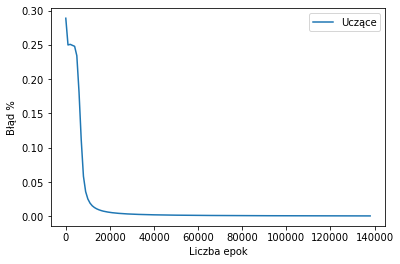

In [3]:
import random

input_list = [(0,0), (1,0), (1,1), (0,1)]
output_list = [(0),(1), (0),(1) ]


x= []
y= []
input_nodes = 2
hidden_nodes = 4
output_nodes = 1
learning_rate = 0.1
momentum = 0.8

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate, momentum)
blad = 0
i= 0
start = timer()
while True:
    w = random.randint(0,3)
    nn.train(input_list[w], output_list[w])
    if i%1000 == 0:
        blad = 0
        for z in range(4):
            tmp = nn.querry(input_list[z]) - output_list[z]
            blad +=  tmp*tmp
#             print("Actual:", nn.querry(input_list[z])," Target: ", output_list[z])
        blad /=4
        x.append((i))
        y.append((float(blad)))
    if blad < 0.0005:
        print("Epoka: ", i , " Blad:", blad)
        break
    i+=1
    
print("Time: ", timer()-start) 

for i in range(4):
    print("Actual:", nn.querry(input_list[i%4])," Target: ", output_list[i%4])

plt.plot(x,y,label="Uczące")
plt.ylabel("Błąd %")
plt.xlabel("Liczba epok")
plt.legend()
plt.show()